This Notebook Compares some line algorithms, as well as implementing a circle function.

In [1]:
import matplotlib.pyplot as plt
import math

In [17]:
def go_to_final_fixed(x_current, y_current, x_final, y_final, squared_error, step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    
    dx = x_final - x_current
    dy = y_final - y_current
    total_distance = (dx**2 + dy**2)**0.5

    # Error accumulators
    error_x = 0
    error_y = 0

    while dx**2 + dy**2 > squared_error:
        # Calculate step increments proportional to the slope
        step_dx = step_size * (dx / total_distance)
        step_dy = step_size * (dy / total_distance)

        # Add the errors to the increments
        step_dx += error_x
        step_dy += error_y

        # Round steps to the nearest step size for stepper motor precision
        rounded_dx = round(step_dx / step_size) * step_size
        rounded_dy = round(step_dy / step_size) * step_size
        # print(round(step_dx / step_size), round(step_dy / step_size))

        # Update the errors (fractional part not accounted for)
        error_x = step_dx - rounded_dx
        error_y = step_dy - rounded_dy

        # Update the current position
        x_current += rounded_dx
        y_current += rounded_dy

        # Append new coordinates
        x_coords.append(x_current)
        y_coords.append(y_current)

        # Update remaining distance
        dx = x_final - x_current
        dy = y_final - y_current
        total_distance = (dx**2 + dy**2)**0.5

    return [x_coords, y_coords]


In [2]:
def go_to_final(x_current, y_current, x_final, y_final, squared_error, step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    
    dx = x_final - x_current
    dy = y_final - y_current
    total_distance = (dx**2 + dy**2)**0.5

    while dx**2 + dy**2 > squared_error:
        # Calculate step increments proportional to the slope
        step_dx = step_size * (dx / total_distance)
        step_dy = step_size * (dy / total_distance)

        # Round steps to the nearest step_size for stepper motor precision
        step_dx = round(step_dx / step_size) * step_size
        step_dy = round(step_dy / step_size) * step_size
        # print(step_dx//step_size, step_dy//step_size)

        # Update the current position
        x_current += step_dx
        y_current += step_dy

        # Append new coordinates
        x_coords.append(x_current)
        y_coords.append(y_current)

        # Update remaining distance
        dx = x_final - x_current
        dy = y_final - y_current
        total_distance = (dx**2 + dy**2)**0.5

    return [x_coords, y_coords]


In [3]:
def go_to_improve(x_current,y_current,x_final,y_final,squared_error,step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    dx = x_final - x_current
    dy = y_final - y_current
    while(dx**2+dy**2 > squared_error):
        dx = x_final - x_current
        dy = y_final - y_current
        diff_x = step_size
        diff_y = step_size
        if dx < 0:
           diff_x = -diff_x
           dx=-dx 
        if dy < 0:
            diff_x=-diff_y
            dy=-dy
        if abs(dx) < 0.1:
            for i in range(round(dy)):
                x_current+=diff_y
        
        slope = dy/dx

        if slope >= 1:
            slope = round(dy/step_size)*step_size/dx
            for i in range(round(slope)):
                y_current+=diff_y
            x_current+=diff_x
        
        elif slope < 1:
            slope = round(dx/step_size)*step_size/dy
            for i in range(round(slope)):
                x_current+=diff_x
            y_current+=diff_y
        x_coords.append(x_current)
        y_coords.append(y_current)
    print("Passed")
    return [x_coords,y_coords]

In [4]:
def go_to_original(x_current,y_current,x_final,y_final,squared_error,step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    dx = x_final - x_current
    dy = y_final - y_current
    while(dx**2+dy**2 > squared_error):
        dx = x_final - x_current
        dy = y_final - y_current
        diff_x = step_size
        diff_y = step_size
        if dx < 0:
           diff_x = -diff_x
           dx=-dx 
        if dy < 0:
            diff_x=-diff_y
            dy=-dy
        if abs(dx) < 0.1:
            for i in range(round(dy)):
                y_current+=diff_y
        
        if abs(dy) < 0.1:
            for i in range(round(dx)):
                x_current+=diff_x
        
        slope = dy/dx

        if slope >= 1:
            for i in range(round(slope)):
                y_current+=diff_y
            x_current+=diff_x
        
        elif slope < 1:
            slope = 1/slope
            for i in range(round(slope)):
                x_current+=diff_x
            y_current+=diff_y
        x_coords.append(x_current)
        y_coords.append(y_current)
    return [x_coords,y_coords]

In [5]:
print(*go_to_original(10,10,105,105,0.2**2,0.2))

[10, 10.2, 10.399999999999999, 10.599999999999998, 10.799999999999997, 10.999999999999996, 11.199999999999996, 11.399999999999995, 11.599999999999994, 11.799999999999994, 11.999999999999993, 12.199999999999992, 12.399999999999991, 12.59999999999999, 12.79999999999999, 12.99999999999999, 13.199999999999989, 13.399999999999988, 13.599999999999987, 13.799999999999986, 13.999999999999986, 14.199999999999985, 14.399999999999984, 14.599999999999984, 14.799999999999983, 14.999999999999982, 15.199999999999982, 15.39999999999998, 15.59999999999998, 15.79999999999998, 15.999999999999979, 16.199999999999978, 16.399999999999977, 16.599999999999977, 16.799999999999976, 16.999999999999975, 17.199999999999974, 17.399999999999974, 17.599999999999973, 17.799999999999972, 17.99999999999997, 18.19999999999997, 18.39999999999997, 18.59999999999997, 18.79999999999997, 18.999999999999968, 19.199999999999967, 19.399999999999967, 19.599999999999966, 19.799999999999965, 19.999999999999964, 20.199999999999964, 

1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 0
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
0 1
1 1
1 0


(0.0, 292.09999999999997)

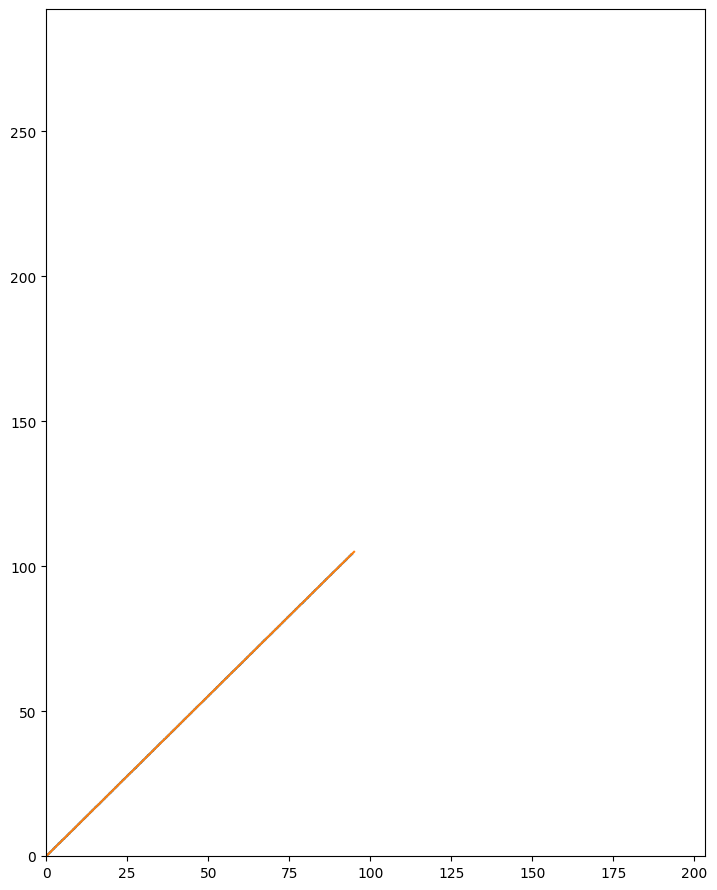

In [15]:
x1,x2=0,95
y1,y2=0,105
plt.figure(figsize=(8.5,11))
plt.plot(*go_to_final_fixed(x1,y1,x2,y2,1,0.2))
# plt.plot(*go_to_final(x1,y1,x2,y2,1,0.2))
plt.plot([x1,x2],[y1,y2])

plt.xlim((0,25.4*8))
plt.ylim((0,25.4*11.5))

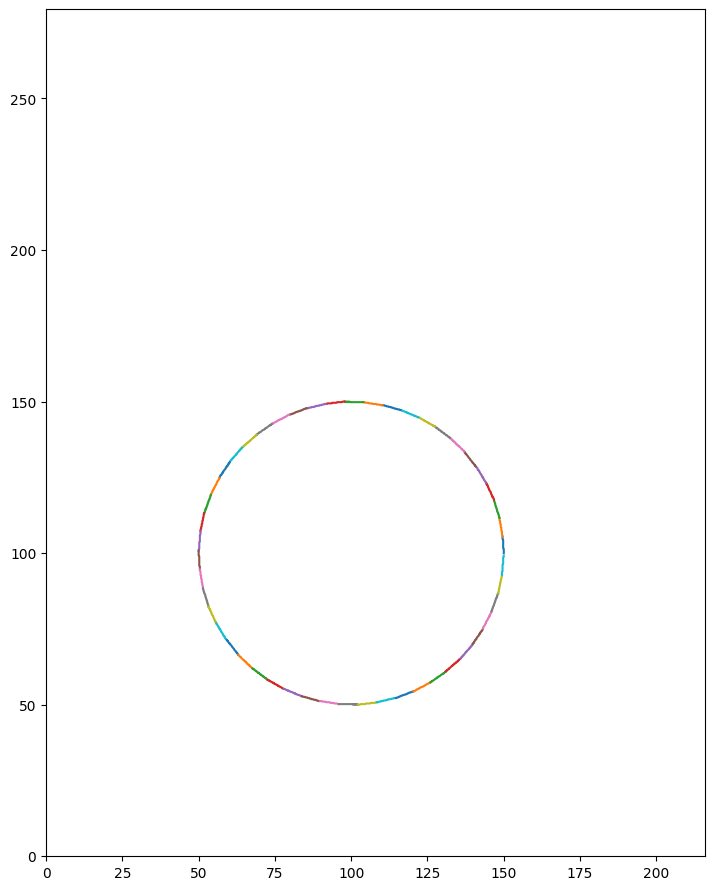

In [19]:
# Circle function:
# radius = 1cm, so circumference = 2
center_x = 100
center_y = 100

x=50
theta=0
radius = 50
x_init = 100+radius
y_init = 100
plt.figure(figsize=(8.5,11))
plt.xlim((0,25.4*8.5))
plt.ylim((0,25.4*11))
for i in range(x):
    theta+=(2*math.pi)/x
    x_curr = center_x + radius * math.cos(theta)
    y_curr = center_y + radius * math.sin(theta)
    move = go_to_final_fixed(x_init,y_init,x_curr,y_curr,1,0.2)
    plt.plot(*move)
    x_init = move[0][-1]
    y_init = move[1][-1]